In [1]:
import hdbscan
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load in data
tbl = pd.read_csv('preprocessed_data_avg.csv')
display(tbl.head())
tbl = tbl[tbl['Filter']=='Ks'] # TODO

# Select only NSs
# states = pd.read_csv('FSRED Mags - total_source_list.csv')
# nss = states[(states['NS/BH']=='NS') | (states['NS/BH']=='NS ') | (states['NS/BH']=='NS (UC)')]['Source'].to_list()
# tbl = tbl[tbl['Source'].isin(nss)]

,Unnamed: 0,Source,Filter,Obs_number,Detected Name,Date obs,RA,DEC,Error_circle (arcsec),Position_source,...,log_L_NIR_errup_nodist,log_L_NIR_errlow_nodist,log_L_NIR_errup_noflux,log_L_NIR_errlow_noflux,log_L_X_errup_nodist,log_L_X_errlow_nodist,log_L_X_errup_noflux,log_L_X_errlow_noflux,log_L_NIR_upplim,log_L_X_upplim
0,0,RX_J1735.3-3540,J,3081,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,0.003808,0.003808,NaN,NaN,0.108574,0.108574,NaN,NaN,NaN,NaN
1,2,RX_J1735.3-3540,H,3063,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,0.002848,0.002848,NaN,NaN,0.108574,0.108574,NaN,NaN,NaN,NaN
2,4,RX_J1735.3-3540,Ks,3045,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,0.003019,0.003019,NaN,NaN,0.108574,0.108574,NaN,NaN,NaN,NaN
3,6,UW_Crb,Ks,1081,S,2018-06-19,16 05 45.8746697208,25 51 45.246497976,0.10,"Gaia Collaboration 2020, Gaia",...,0.051416,0.051416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,UW_Crb,H,1086,S,2018-06-19,16 05 45.8746697208,25 51 45.246497976,0.10,"Gaia Collaboration 2020, Gaia",...,0.038230,0.038230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
blobs = tbl[['log_L_X', 'log_L_NIR']].dropna()

In [4]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
clusterer.fit(blobs)

HDBSCAN(min_cluster_size=2)

In [5]:
blobs.loc[:,"label_hdb"] = clusterer.labels_

In [6]:
clusterer.probabilities_

array([0.        , 0.7521066 , 1.        , 0.63581759, 0.90761773,
       0.85989724, 0.99678886, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.98831574, 1.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       0.76563623, 0.74483754, 0.81289994, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        ])

In [7]:
colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", 'grey']

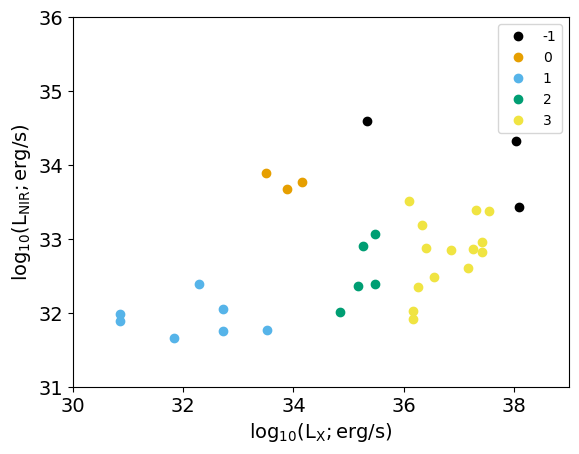

In [8]:
groups = blobs.groupby('label_hdb')
i=0
for name, group in groups:
    c=colors[i]
    i += 1
    plt.plot(group['log_L_X'], group['log_L_NIR'], marker='o', linestyle='', markersize=6, label=name, c=c)
plt.xlim(30, 39)
plt.ylim(31, 36)    
plt.xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=14)
plt.ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s)}$', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.legend()
plt.show()

In [9]:
from sklearn.cluster import AffinityPropagation
import numpy as np

In [10]:
af = AffinityPropagation(random_state=2).fit(blobs)
blobs.loc[:,"label_af"] = af.labels_


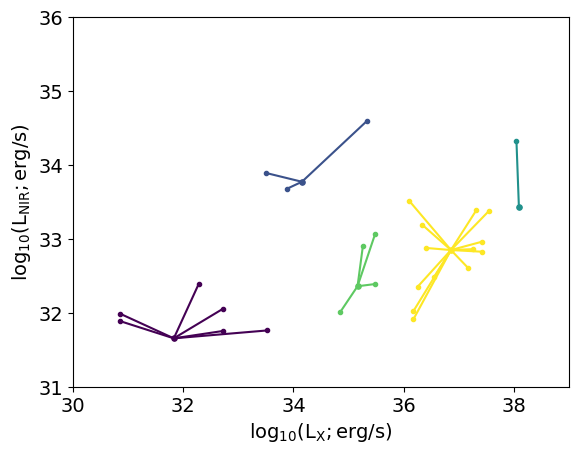

In [11]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
X = blobs.to_numpy()
n_clusters_ = len(cluster_centers_indices)

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 5)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )
plt.xlim(30, 39)
plt.ylim(31, 36)    
plt.xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=14)
plt.ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s)}$', fontsize=14)
plt.tick_params(axis='both', labelsize=14)

# plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [12]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=5).fit(blobs)
blobs.loc[:,"label_sc"] = sc.labels_

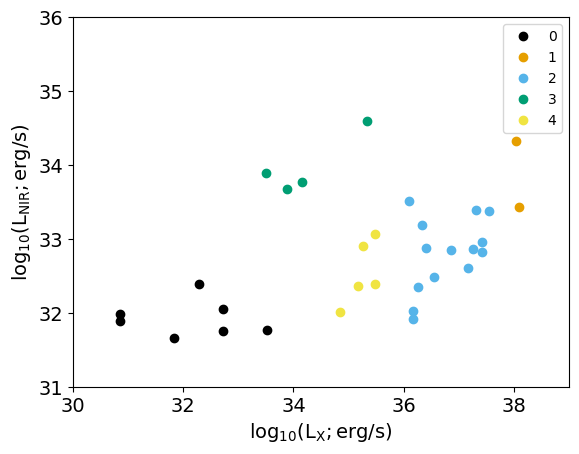

In [13]:
groups = blobs.groupby('label_sc')
colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", 'grey']
i=0
for name, group in groups:
    c=colors[i]
    i += 1
    plt.plot(group['log_L_X'], group['log_L_NIR'], marker='o', linestyle='', markersize=6, label=name, c=c)
plt.xlim(30, 39)
plt.ylim(31, 36)    
plt.xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=14)
plt.ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s)}$', fontsize=14)
plt.tick_params(axis='both', labelsize=14)

plt.legend()
plt.show()

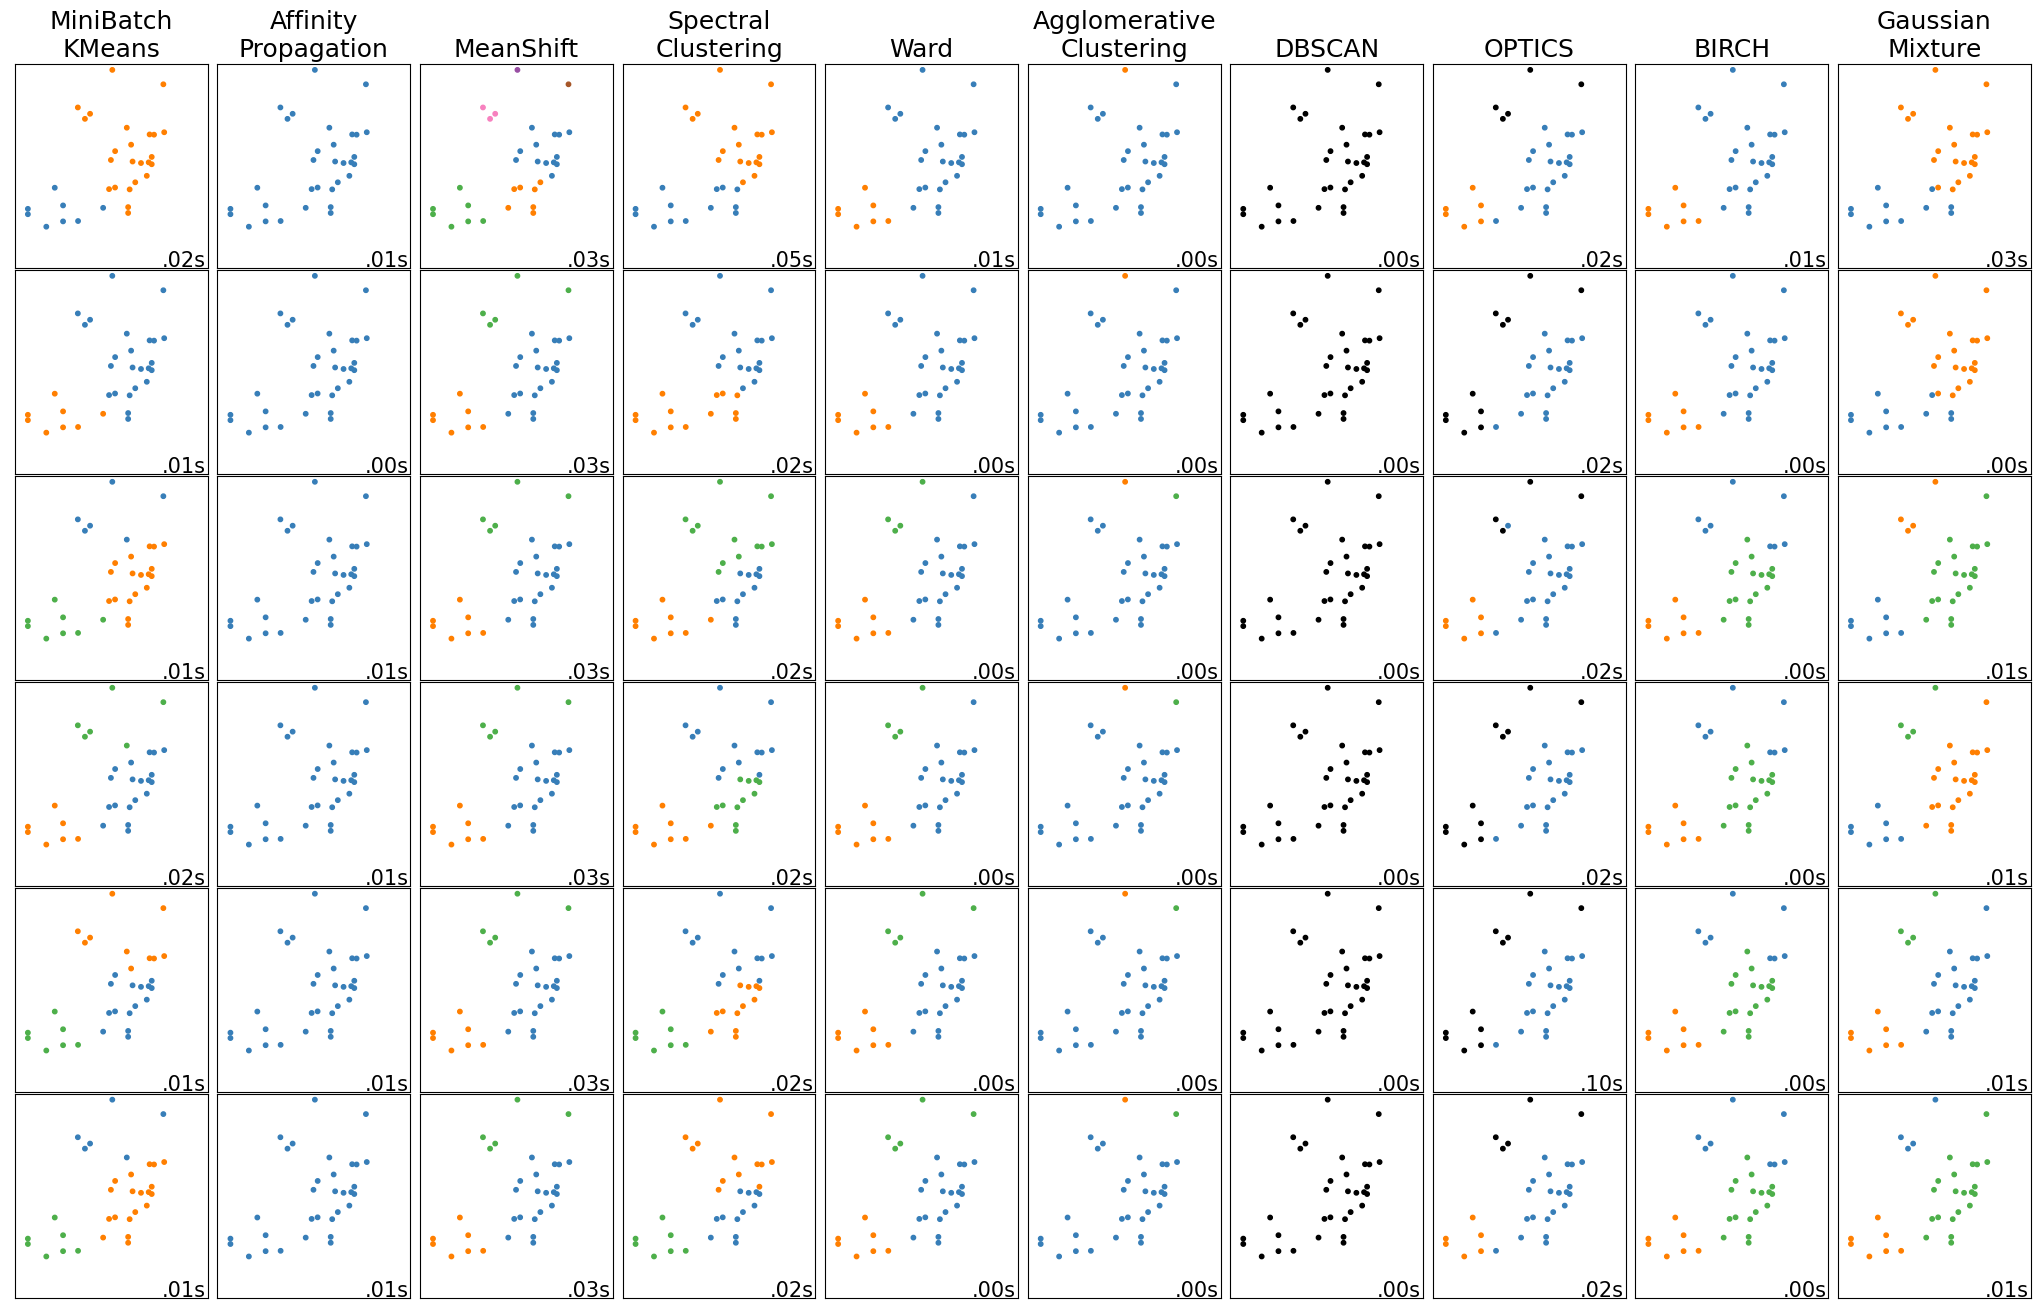

In [14]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)
    
    blobss = tbl[['log_L_X', 'log_L_NIR']].dropna()
    X, y = dataset
    X = tbl[['log_L_X', 'log_L_NIR']].dropna()

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()